In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
#Data preposessing
df['mainroad']=df['mainroad'].map({'yes':1, 'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1,'no':0})
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1, 'no':0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})

In [7]:
#Create a dummy variable for ['furnishingstatus']
status = pd.get_dummies(df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [8]:
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [9]:
df = pd.concat([df,status],axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [10]:
df.drop(['furnishingstatus'], axis=1, inplace=True)

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [12]:
df['areaperbedroom']=df['area']/df['bedrooms']
df['bbratio']= df['bedrooms']/df['bathrooms']

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,2.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,1.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,2.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,4.0


In [14]:
#Rescalling the feature

def notmalize(x):
    return ((x-np.min(x))/(np.max(x)-np.min(x)))

df = df.apply(notmalize)

In [15]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [16]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]
Y = df['price']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=100)

In [19]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
lr= sm.OLS(Y_train, X_train).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.10
Date:                Sat, 02 May 2020   Prob (F-statistic):           4.71e-82
Time:                        19:09:28   Log-Likelihood:                 384.37
No. Observations:                 381   AIC:                            -736.7
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0840      0.038     

In [28]:
#Checking Variance Inflaction Factor(VIF)
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    X_vars = input_data.drop([dependent_col], axis=1)
    xvar_names = X_vars.columns
    for i in range(0, xvar_names.shape[0]):
        Y = X_vars[xvar_names[i]]
        X=X_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(Y,X).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [29]:
vif_cal(input_data = df, dependent_col='price')

,Var,Vif
1,bedrooms,103.15
14,bbratio,74.73
0,area,20.94
2,bathrooms,20.78
13,areaperbedroom,18.72
4,mainroad,7.48
3,stories,2.83
11,semi-furnished,2.53
12,unfurnished,2.25
6,basement,2.05


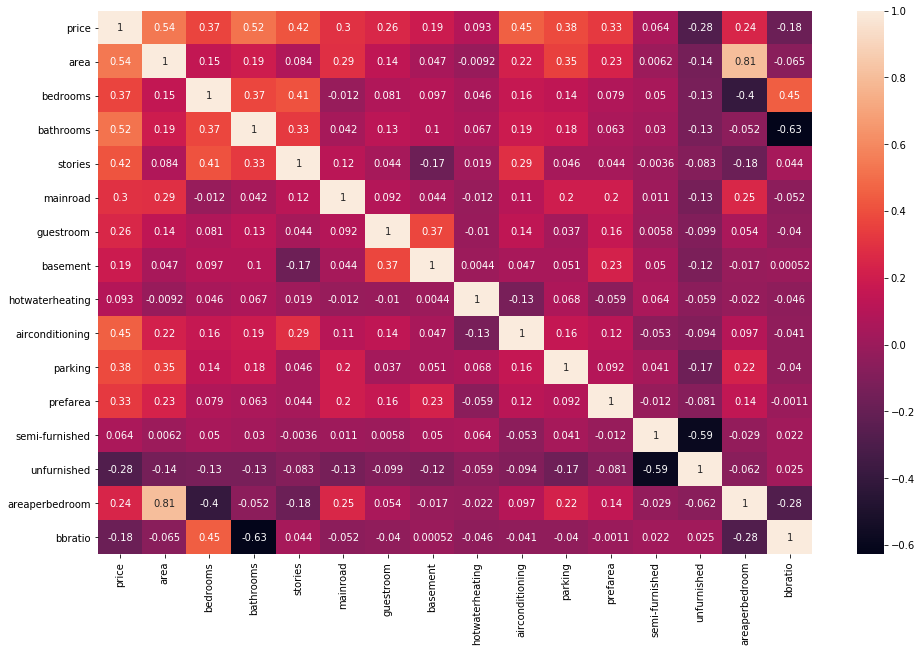

In [33]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot= True)

In [34]:
X_train = X_train.drop('bbratio', 1)

In [35]:
lr = sm.OLS(Y_train, X_train).fit()

In [36]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Sat, 02 May 2020   Prob (F-statistic):           6.46e-83
Time:                        21:13:03   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

In [38]:
vif_cal(input_data=df.drop(['bbratio'], axis=1), dependent_col='price')

,Var,Vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [39]:
X_train = X_train.drop('bedrooms', 1)
lr_3 = sm.OLS(Y_train, X_train).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Sat, 02 May 2020   Prob (F-statistic):           1.66e-83
Time:                        21:24:21   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

In [42]:
vif_cal(input_data = df.drop('bedrooms', axis=1), dependent_col = 'price')

,Var,Vif
0,area,19.50
12,areaperbedroom,17.35
3,mainroad,7.43
13,bbratio,7.26
1,bathrooms,3.20
2,stories,2.83
10,semi-furnished,2.53
11,unfurnished,2.25
5,basement,2.05
8,parking,2.01


In [43]:
X_train = X_train.drop('semi-furnished', axis=1)

lr_4 = sm.OLS(Y_train, X_train).fit()

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     66.51
Date:                Sat, 02 May 2020   Prob (F-statistic):           1.99e-84
Time:                        21:34:27   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -741.1
Df Residuals:                     368   BIC:                            -689.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.016     

In [44]:
vif_cal(input_data=df.drop(['bedrooms', 'bbratio', 'areaperbedroom', 'semi-furnished'], axis=1), dependent_col='price')

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


In [47]:
X_train = X_train.drop(['basement, areaperbedroom'], axis=1)
lr_5 = sm.OLS(Y_train, X_train).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     71.80
Date:                Sat, 02 May 2020   Prob (F-statistic):           1.18e-84
Time:                        21:45:48   Log-Likelihood:                 381.83
No. Observations:                 381   AIC:                            -739.7
Df Residuals:                     369   BIC:                            -692.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0498      0.015     

In [56]:
X_train = X_train.drop(['areaperbedroom'], axis=1)
lr_5 = sm.OLS(Y_train, X_train).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sat, 02 May 2020   Prob (F-statistic):           3.13e-84
Time:                        22:18:26   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

In [49]:
#Predict Model
X_test = sm.add_constant(X_test)

In [ ]:
X_test = X_test.drop(['bedrooms', 'bbratio', 'areaperbedroom', 'semi-furnished','basement'],axis=1)

In [76]:
Y_pred = lr_5.predict(X_test)

Text(0, 0.5, 'Price')

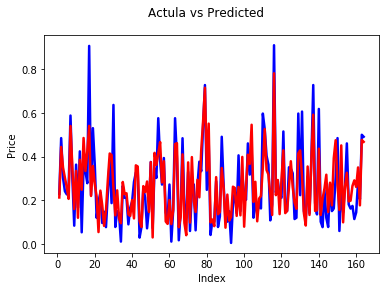

In [77]:
#Actual vs Predicted
index = [x for x in range(1,165)]
plt.figure()
plt.plot(index, Y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(index,Y_pred, color='red', linewidth=2.5, linestyle='-')
plt.suptitle('Actula vs Predicted')
plt.xlabel('Index')
plt.ylabel('Price')

Text(0, 0.5, 'Price_test - Price_pred')

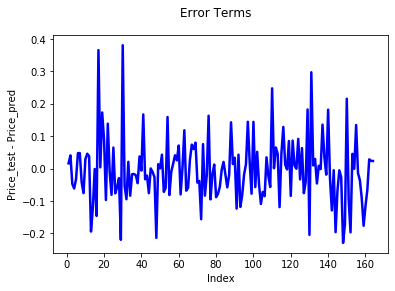

In [78]:
#Error Terms
plt.figure()
plt.plot(index, Y_test-Y_pred, color='blue', linewidth=2.5, linestyle='-')
plt.suptitle('Error Terms')
plt.xlabel('Index')
plt.ylabel('Price_test - Price_pred')

Text(0, 0.5, 'Price_test - Price_pred')

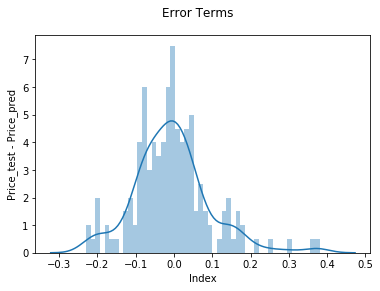

In [81]:
plt.figure()
sns.distplot((Y_test-Y_pred), bins=50)
plt.suptitle('Error Terms')
plt.xlabel('Index')
plt.ylabel('Price_test - Price_pred')